In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from dateutil import relativedelta
import numpy as np
import pandahouse as ph
import requests
from urllib.parse import urlencode

Загрузим таблицу с уникальными идентификаторами пользователей

In [5]:
path_to_customers = 'https://disk.yandex.ru/d/QXrVDUoQvFhIcg'

In [7]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
final_url = base_url + urlencode(dict(public_key=path_to_customers))
response = requests.get(final_url)
download_url = response.json()['href']
customers = pd.read_csv(download_url)

Загрузим таблицу с товарными позициями, входящими в заказы

In [9]:
path_to_order_items = 'https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg'

In [10]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
final_url = base_url + urlencode(dict(public_key=path_to_order_items))
response = requests.get(final_url)
download_url = response.json()['href']
order_items = pd.read_csv(download_url)

Загрузим таблицу заказов

In [13]:
path_to_orders = 'https://disk.yandex.ru/d/0zWmh1bYP6REbw'

In [14]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
final_url = base_url + urlencode(dict(public_key=path_to_orders))
response = requests.get(final_url)
download_url = response.json()['href']
orders = pd.read_csv(download_url)

In [15]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [6]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [7]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)

In [9]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
customers.shape

(99441, 5)

In [11]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


# Договоримся, что считаем покупкой ситуацию, когда заказ оплачен, не отменен, не недоступен

Все покупки:

In [12]:
orders.query("order_purchase_timestamp != 'NaN' and order_status != 'canceled' and order_status != 'unavailable'") \
.groupby('order_status', as_index=False) \
.agg({'order_id': 'nunique'})

,order_status,order_id
0,approved,2
1,created,5
2,delivered,96478
3,invoiced,314
4,processing,301
5,shipped,1107


# 1. Сколько у нас пользователей, которые совершили покупку только один раз?

In [13]:
purchases = orders.query("order_purchase_timestamp != 'NaN' and order_status != 'canceled' and order_status != 'unavailable'")

In [14]:
customers_bought_once = customers.merge(purchases, on='customer_id') \
.groupby('customer_unique_id', as_index=False) \
.agg({'order_id': 'nunique'})\
.query('order_id == 1') \
.customer_unique_id.nunique()

Пользователи, которые совершили покупку только один раз

In [15]:
customers_bought_once

92102

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

Добавим в таблицу orders год и месяц доставки

In [16]:
orders['order_estimated_delivery_year'] = orders.order_estimated_delivery_date.dt.year

In [17]:
orders['order_estimated_delivery_month'] = orders.order_estimated_delivery_date.dt.month

Посмотрим какие у нас есть статусы

In [18]:
orders.query("order_delivered_customer_date.isna() == True") \
.groupby('order_status', as_index=False) \
.agg({'order_id': 'nunique'})

,order_status,order_id
0,approved,2
1,canceled,619
2,created,5
3,delivered,8
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


Статус заказа delivered, но нет даты доставки заказа. Вопрос: доставлены ли на самом деле эти заказы?

In [19]:
orders.query("order_status == 'delivered' and order_delivered_customer_date.isna() == True") \
.groupby('order_status', as_index=False) \
.agg({'order_id': 'nunique'})

,order_status,order_id
0,delivered,8


Статус заказа canceled, но есть даты доставки заказа. Вопрос: доставлены ли на самом деле эти заказы?

In [20]:
orders.query("order_status == 'canceled' and order_delivered_customer_date.isna() == False") \
.groupby('order_status', as_index=False) \
.agg({'order_id': 'nunique'})

,order_status,order_id
0,canceled,6


Будем считать, что недоставленные - это недоступные (unavailable) и отмененные (canceled)

In [21]:
orders.query("(order_status == 'unavailable' | order_status == 'canceled') and order_delivered_customer_date.isna() == True") \
.groupby(['order_status', 'order_estimated_delivery_year', 'order_estimated_delivery_month'], as_index=False) \
.agg({'order_id': 'nunique'}) \
.groupby('order_status', as_index = False) \
.agg({'order_id':'mean'}) \
.round()

,order_status,order_id
0,canceled,24.0
1,unavailable,29.0


Среднее число недоставленных заказов в месяц: 24 отмененных, 29 недоступных

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается

Для начала объединим таблицу с покупками и таблицу с товарами и посмотрим когда кокупался тот или иной товар

In [22]:
purchases_merge = purchases.merge(order_items, on='order_id')

In [23]:
products = purchases_merge[['product_id','order_purchase_timestamp']]

In [24]:
products

,product_id,order_purchase_timestamp
0,87285b34884572647811a353c7ac498a,2017-10-02 10:56:33
1,595fac2a385ac33a80bd5114aec74eb8,2018-07-24 20:41:37
2,aa4383b373c6aca5d8797843e5594415,2018-08-08 08:38:49
3,d0b61bfb1de832b15ba9d266ca96e5b0,2017-11-18 19:28:06
4,65266b2da20d04dbe00c5c2d3bb7859e,2018-02-13 21:18:39
...,...,...
112096,f1d4ce8c6dd66c47bbaa8c6781c2a923,2018-02-06 12:58:58
112097,b80910977a37536adeddd63663f916ad,2017-08-27 14:46:43
112098,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-08 21:28:27
112099,d1c427060a0f73f6b889a5c7c61f2ac4,2018-01-08 21:28:27


In [25]:
products['order_purchase_timestamp_day'] = products.order_purchase_timestamp.dt.day_name()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
products.order_purchase_timestamp.dt.day_name()

0            Monday
1           Tuesday
2         Wednesday
3          Saturday
4           Tuesday
            ...    
112096      Tuesday
112097       Sunday
112098       Monday
112099       Monday
112100     Thursday
Name: order_purchase_timestamp, Length: 112101, dtype: object

Теперь надо взять лучший день недели по каждому товару, используем cumcount, затем отбираем покупки с cumcount=1

In [27]:
products_days = products.groupby(['product_id','order_purchase_timestamp_day'], as_index=False) \
.agg({'order_purchase_timestamp': 'count'}) \
.rename(columns={'order_purchase_timestamp': 'purchases'})

In [28]:
products_days['cumcount'] = products_days.sort_values('purchases', ascending=False) \
                                         .groupby('product_id') \
                                         .cumcount() + 1

В результате получаем таблицу, в которой можем увидеть, в какой день недели тот и иной товар чаще покупается

In [29]:
products_days.query('cumcount == 1')

,product_id,order_purchase_timestamp_day,purchases,cumcount
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1,1
3,000b8f95fcb9e0096488278317764d19,Friday,1,1
5,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1,1
...,...,...,...,...
60881,fff6177642830a9a94a0f2cba5e476d1,Saturday,1,1
60883,fff81cc3158d2725c0655ab9ba0f712c,Monday,1,1
60884,fff9553ac224cec9d15d49f5a263411f,Friday,1,1
60888,fffdb2d0ec8d6a61f0a0a0db3f25b441,Tuesday,2,1


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

Объединим таблицу с покупками и таблицу с покупателями

In [30]:
customers_purchases_merge = purchases.merge(customers, on='customer_id')

In [31]:
customers_purchases = customers_purchases_merge[['customer_unique_id', 'order_id', 'order_purchase_timestamp']]

In [32]:
customers_purchases.head()

,customer_unique_id,order_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39


Определим сколько недель в каждом месяце

In [33]:
weeks = pd.DataFrame(columns=['date', 'month', 'year'])

In [34]:
weeks['date'] = products.order_purchase_timestamp

In [35]:
weeks['month'] = weeks.date.dt.month_name()

In [36]:
weeks['year'] = weeks.date.dt.year

In [37]:
weeks['weeks_in_month'] = round(weeks.date.dt.daysinmonth / 7, 2)

In [38]:
weeks_in_month = weeks[['month', 'year', 'weeks_in_month']].drop_duplicates()

Добавим в нашу таблицу с покупателями, заказами и датой покупок месяц и год покупки

In [39]:
customers_purchases['month'] = products.order_purchase_timestamp.dt.month_name()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
customers_purchases['year'] = products.order_purchase_timestamp.dt.year

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
customers_purchases

,customer_unique_id,order_id,order_purchase_timestamp,month,year
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,October,2017
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,July,2018
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,August,2018
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,November,2017
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,February,2018
...,...,...,...,...,...
98202,6359f309b166b0196dbf7ad2ac62bb5a,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,April,2018
98203,da62f9e57a76d978d02ab5362c509660,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,July,2017
98204,737520a9aad80b3fbbdad19b66b37b30,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,May,2018
98205,5097a5312c8b157bb7be58ae360ef43c,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,August,2017


Объедимим с таблицей с количеством недель

In [42]:
customers_purchases = customers_purchases.groupby(['customer_unique_id', 'year', 'month'], as_index=False) \
.agg({'order_id': 'count'}) \
.merge(weeks_in_month, on=['year', 'month'])

Добавим количество покупок в неделю

In [43]:
customers_purchases['purchases_per_week'] = customers_purchases.order_id / customers_purchases.weeks_in_month

In [44]:
customers_purchases.sort_values('purchases_per_week', ascending=False)

,customer_unique_id,year,month,order_id,weeks_in_month,purchases_per_week
10092,8d50f5eadf50201ccdcedfb9e2ac8455,2018,May,5,4.43,1.128668
91370,8d50f5eadf50201ccdcedfb9e2ac8455,2018,June,4,4.29,0.932401
79603,e1224167b1a3f92781c2ff55b0b794be,2018,April,3,4.29,0.699301
68099,8d50f5eadf50201ccdcedfb9e2ac8455,2018,July,3,4.43,0.677201
52425,3e43e6105506432c953e165fb2acf44c,2017,December,3,4.43,0.677201
...,...,...,...,...,...,...
39833,9f18c0829aebe6fad3c78accda00f854,2018,January,1,4.43,0.225734
39832,9f10a450cddebea0e7cd86f67c894d1c,2018,January,1,4.43,0.225734
39831,9f0c1d85392533a1e960d4d58915c59b,2018,January,1,4.43,0.225734
39830,9ef79cdfdf9ce84cd2bd5b836599c1fa,2018,January,1,4.43,0.225734


# 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 

Для начала отберем из таблицы с покупками только те столбцы, которые нам нужны: customer_unique_id, order_purchase_timestamp

In [45]:
df5 = customers_purchases_merge[['customer_unique_id', 'order_purchase_timestamp']]

Отберем только первые покупки каждого покупателя

In [46]:
first_purchases = df5.groupby('customer_unique_id', as_index=False) \
                     .agg({'order_purchase_timestamp': 'min'}) \
                     .rename(columns={'order_purchase_timestamp': 'first_purchase_date'})

Объединим таблицу со всеми покупками с таблицей с первыми покупками так, чтобы для каждого покупателя мы знали даты первой покупки

In [47]:
all_purchases = df5.merge(first_purchases, on='customer_unique_id')

Посчитаем разницу между датой покупки и датой первой покупки

In [48]:
def diff_month(x):

    d1 = x['order_purchase_timestamp']

    d2 = x['first_purchase_date']

    return ((d1.year - d2.year) * 12 + d1.month - d2.month)


all_purchases['diff_months'] = all_purchases.apply(lambda x: diff_month(x), axis=1)

Приведем даты к формату год-месяц

In [49]:
all_purchases.order_purchase_timestamp = pd.to_datetime(all_purchases.order_purchase_timestamp).dt.to_period('m')
all_purchases.first_purchase_date = pd.to_datetime(all_purchases.first_purchase_date).dt.to_period('m')

1. Отберем только тех пользователей, первая покупка которых пришлась на 2017 год
2. Отберем только покупку, совершенные в 2017 году
3. Создадим сводную таблицу по когортам. Когорты создадим исходя из месяца первой покупки. В этой таблице мы видим как меняется количество покупателей в каждой когорте

In [50]:
cohort_table = all_purchases[(all_purchases['first_purchase_date'] >= '2017-01') & (all_purchases['first_purchase_date'] <= '2017-12') & (all_purchases['order_purchase_timestamp'] >= '2017-01') & (all_purchases['order_purchase_timestamp'] <= '2017-12')] \
.rename(columns={'first_purchase_date': 'cohorts', 'diff_months': 'cohort_period'}) \
.groupby(['cohorts', 'cohort_period'], as_index=False) \
.agg({'customer_unique_id': 'nunique'}) \
.pivot(index='cohorts', columns='cohort_period', values='customer_unique_id')

In [51]:
cohort_table

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11
cohorts,,,,,,,,,,,,
2017-01,752.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0
2017-02,1690.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,NaN
2017-03,2571.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,NaN,NaN
2017-04,2325.0,14.0,5.0,4.0,7.0,6.0,8.0,7.0,7.0,NaN,NaN,NaN
2017-05,3541.0,17.0,17.0,14.0,11.0,12.0,15.0,5.0,NaN,NaN,NaN,NaN
2017-06,3102.0,14.0,11.0,12.0,8.0,12.0,11.0,NaN,NaN,NaN,NaN,NaN
2017-07,3822.0,20.0,13.0,9.0,11.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,4130.0,28.0,14.0,11.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,4075.0,28.0,22.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Посчитаем retention

In [52]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0],axis=0)

In [53]:
new_cohort_table

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11
cohorts,,,,,,,,,,,,
2017-01,1.0,0.003989,0.002660,0.001330,0.003989,0.001330,0.003989,0.001330,0.001330,NaN,0.003989,0.00133
2017-02,1.0,0.002367,0.002959,0.001183,0.004142,0.001183,0.002367,0.001775,0.001183,0.001775,0.001183,NaN
2017-03,1.0,0.005056,0.003501,0.003890,0.003501,0.001556,0.001556,0.003112,0.003501,0.000778,NaN,NaN
2017-04,1.0,0.006022,0.002151,0.001720,0.003011,0.002581,0.003441,0.003011,0.003011,NaN,NaN,NaN
2017-05,1.0,0.004801,0.004801,0.003954,0.003106,0.003389,0.004236,0.001412,NaN,NaN,NaN,NaN
2017-06,1.0,0.004513,0.003546,0.003868,0.002579,0.003868,0.003546,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005233,0.003401,0.002355,0.002878,0.002093,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006780,0.003390,0.002663,0.003632,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006871,0.005399,0.002945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


На основе таблицы с retention сделаем тепловую карту, где чем синее квадратик, тем меньше retention, а чем краснее квадратик, тем retention больше

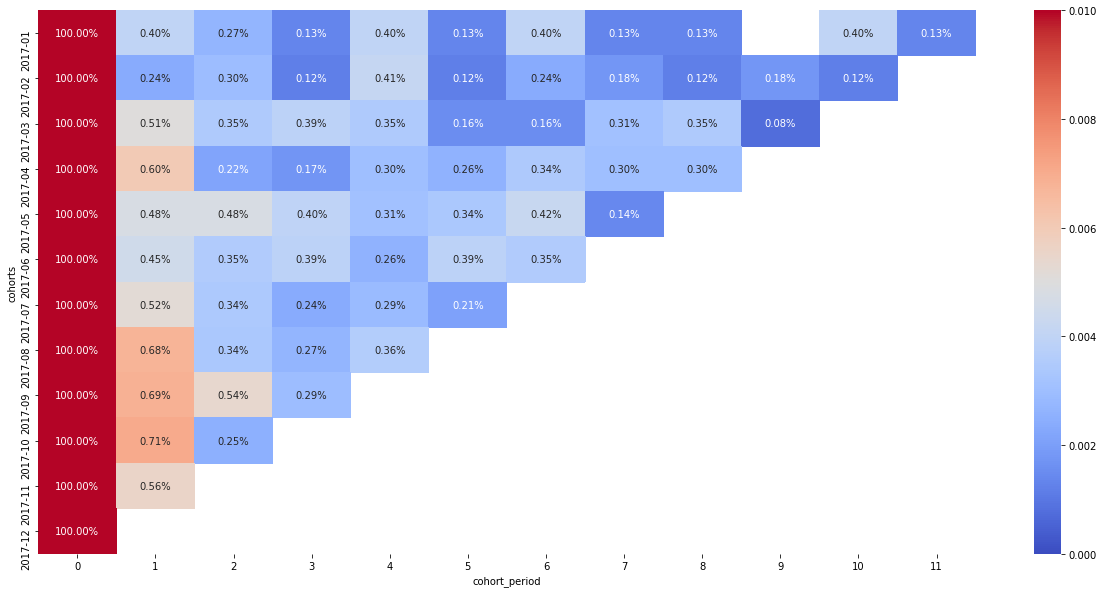

In [54]:
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.2%', vmin=0, vmax=0.01, center=0.005, cmap= 'coolwarm')

Узнаем, в какой когорте в на третий месяц был самый высокий retention

In [55]:
new_cohort_table[3].idxmax()

Period('2017-05', 'M')

Самый высокий retention на третий месяц был в когорте 2017-05, то есть у тех покупателей, которые совершили первую покупку в мае 2017 гда

# 6. RFM-сегментация пользователей

Возьмем из таблички с покупателями и заказами только то, что нам нужно

In [112]:
df6 = customers_purchases_merge[['customer_unique_id', 'order_id', 'order_purchase_timestamp']]

Посчитаем сколько стоил каждый заказ

In [113]:
order_price = order_items.groupby('order_id', as_index=False).agg({'price': 'sum'})

Объединим таблицу с покупателями и заказами и таблицу со стоимостью заказов

In [114]:
customers_purchases_prices = df6.merge(order_price, on='order_id')


Сагрегируем данные так, чтобы получить для каждого покупателя количество заказов, сумму всех заказов, дату последнего заказа

In [115]:
rfm = customers_purchases_prices.groupby('customer_unique_id', as_index=False) \
.agg({'order_id': 'count', 'price': 'sum', 'order_purchase_timestamp': 'max'})

Посчитаем сколько дней прошло с пошледнего заказа до последней даты покупки в датафрейме

In [116]:
last_day = customers_purchases_prices.order_purchase_timestamp.max()

In [118]:
rfm['days_since_order'] = (last_day - rfm['order_purchase_timestamp']).dt.days

Поменяем местами колонки и переименуем их, чтобы было понятнее

In [119]:
rfm = rfm[['customer_unique_id', 'days_since_order', 'order_id', 'price']]

In [120]:
rfm = rfm.rename(columns={'days_since_order': 'recency', 'order_id': 'frequency', 'price': 'monetary'})

Посмотрим, какие значения есть в каждой из категорий

In [122]:
rfm.describe()

,recency,frequency,monetary
count,94983.000000,94983.000000,94983.000000
mean,242.433077,1.033859,142.071747
std,152.983982,0.210811,216.074999
min,0.000000,1.000000,0.850000
25%,118.000000,1.000000,47.900000
50%,223.000000,1.000000,89.890000
75%,351.000000,1.000000,155.000000
max,728.000000,16.000000,13440.000000


Посмотрим на frequency. Отказываемся от идеи делить эту категорию по квантилям. Как мы видим, большинство покупателей сделали одну покупку. Таким покупателям присваиваем 1 балл frequency. Тем, кто сделал 2 покупки — 2 балла, остальным — 3 балла.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


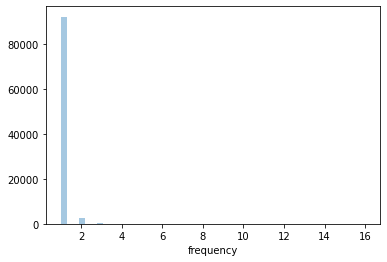

In [123]:
sns.distplot(rfm.frequency, kde=False)

In [124]:
rfm.groupby('frequency').agg({'customer_unique_id': 'count'})

,customer_unique_id
frequency,
1,92096
2,2651
3,188
4,29
5,9
6,5
7,3
9,1
16,1


In [141]:
def f_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3

Посмотрим на recency. На мой взгляд, в этой категории мы можем поделить пользователей по кватилям, потому что здесь достаточно наблюдений в каждой из групп

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


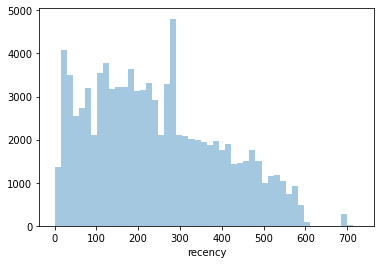

In [125]:
sns.distplot(rfm.recency, kde=False)

Делим на квантили

In [142]:
quintiles = rfm[['recency']].quantile([.25, .50, .75]).to_dict()
quintiles

{'recency': {0.25: 118.0, 0.5: 223.0, 0.75: 351.0}}

In [143]:
def r_score(x):
    if x <= quintiles['recency'][.25]:
        return 3
    elif x <= quintiles['recency'][.50]:
        return 2
    else:
        return 1

Посмотрим на monetary. Как мы видим, большинство покупателей потратили меньше 300, при этом есть покупатели, которые потратили больше 10000.

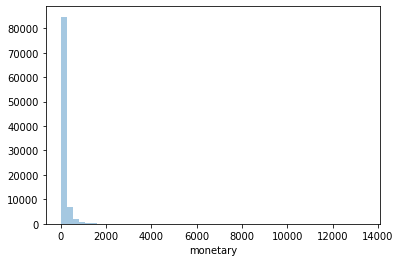

In [126]:
sns.distplot(rfm.monetary, kde=False)

In [131]:
rfm.query('monetary > 300').agg({'customer_unique_id': 'count'})

customer_unique_id    8239
dtype: int64

In [132]:
rfm.query('monetary > 1000').agg({'customer_unique_id': 'count'})

customer_unique_id    958
dtype: int64

In [138]:
rfm.query('monetary > 3000').agg({'customer_unique_id': 'count'})

customer_unique_id    35
dtype: int64

 Разделим на группы вручную. До 300 — 1 балл, 300-1000 — 2 балла, больше 1000 — 3 балла

In [144]:
def m_score(x):
    if x <= 300:
        return 1
    elif x > 1000:
        return 3
    else:
        return 2

Cоздадим колонки с баллами за каждый параметр

In [145]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x))

Cоединим баллы по каждому параметру

In [147]:
rfm['RFM_score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

In [149]:
rfm

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,3,1,1,311
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,3,1,1,311
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,1,111
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,1,1,111
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,1,1,111
...,...,...,...,...,...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,1,1,3,113
94979,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,1,1,1,111
94980,ffff371b4d645b6ecea244b27531430a,572,1,89.90,1,1,1,111
94981,ffff5962728ec6157033ef9805bacc48,123,1,115.00,2,1,1,211


Посмотрим на размер и средние значения в получившихся группах

In [154]:
rfm.groupby('RFM_score', as_index=False) \
.agg({'customer_unique_id': 'count', 'recency': 'mean', 'frequency': 'mean', 'monetary': 'mean'})

,RFM_score,customer_unique_id,recency,frequency,monetary
0,111,42314,368.860377,1.000000,94.152014
1,112,3319,377.597770,1.000000,499.111998
2,113,456,374.971491,1.000000,1608.043311
3,121,943,359.633086,2.000000,146.976660
4,122,249,351.052209,2.000000,472.184618
5,123,25,328.360000,2.000000,1746.091200
6,131,49,395.265306,3.122449,168.447959
7,132,33,340.515152,3.181818,507.100000
8,133,5,296.000000,3.200000,1625.940000
9,211,21185,170.708520,1.000000,95.013350


Разобьем покупателей на сегменты:  
Потерянные — давние покупатели, которые совершили всего одну покупку — 111, 112, 113  
Под угрозой оттока — покупатели, которые покупали давно, но совершили больше одной покупки — 121, 122, 123, покупатели, которые совершили одну покупку, и прошло уже какое-то время с момента этой покупки — 211, 212, 213   
Бывшие лояльные — покупатели, которые сделали больше двух покупок на разные чеки, но перестали со временем — 131, 132, 133  
Новички — клиенты, которые недавно совершали покупку — 311, 312, 313  
Лояльные — покупатели, сделавшие недавно более одной покупки — 221, 231, 321, 331
Перспективные — новые клиеты, купившие на большой чек — 313, 323. Покупатели, которые совершили больше 2 покупок на средний чек — 233, 233, 332   
Идеальные — покупатели, которые заказывают много и часто — 333, 233, 332

In [167]:
segt_map = {
    r'11[1-3]': 'Потерянные',
    r'[1-2][1-2][1-3]': 'Под угрозой оттока',
    r'13[1-3]': 'Бывшие лояльные',
    r'31[1-3]': 'Новички',
    r'[2-3][2-3]1': 'Лояльные',
    r'3[1-2]3': 'Перспективные',
    r'[2-3]2[2-3]': 'Перспективные',
    r'[2-3]3[2-3]': 'Идеальные'
}

rfm['segment'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm['segment'] = rfm['segment'].replace(segt_map, regex=True)
rfm

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,129.90,3,1,1,311,Новички
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,18.90,3,1,1,311,Новички
2,0000f46a3911fa3c0805444483337064,541,1,69.00,1,1,1,111,Потерянные
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,25.99,1,1,1,111,Потерянные
4,0004aac84e0df4da2b147fca70cf8255,292,1,180.00,1,1,1,111,Потерянные
...,...,...,...,...,...,...,...,...,...
94978,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,1570.00,1,1,3,113,Потерянные
94979,fffea47cd6d3cc0a88bd621562a9d061,266,1,64.89,1,1,1,111,Потерянные
94980,ffff371b4d645b6ecea244b27531430a,572,1,89.90,1,1,1,111,Потерянные
94981,ffff5962728ec6157033ef9805bacc48,123,1,115.00,2,1,1,211,Под угрозой оттока


In [168]:
rfm.groupby('segment').agg({'RFM_score': 'count'})

,RFM_score
segment,
Бывшие лояльные,87
Идеальные,85
Лояльные,622
Новички,22959
Перспективные,171
Под угрозой оттока,24970
Потерянные,46089


Посмотрим на распределение покупателей внутри сегементов:  
Мы видим, что большинство покупателей давно совершили одну покупку и относятся к потерянным 

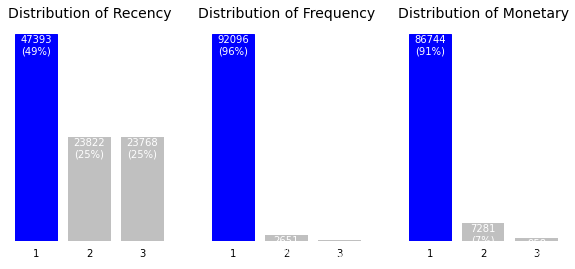

In [170]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

for i, p in enumerate(['R', 'F', 'M']):
    parameters = {'R':'Recency', 'F':'Frequency', 'M':'Monetary'}
    y = rfm[p].value_counts()
    x = y.index.astype('int')
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('blue')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 2,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')

plt.show()

Посчитаем количество покупателей в каждом сегменте:  
Мы видим, что 46% покупателей относятся к потерянным  
24% под угрозой оттока, а 24% новички. Возможно, нам нужно сосредоточиться на удержании этих покупателей

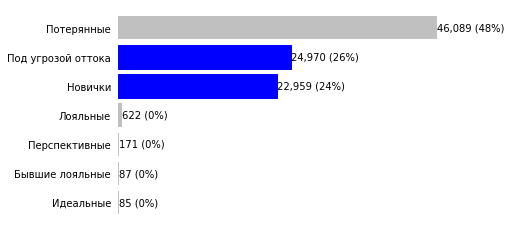

In [173]:
segments_counts = rfm['segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Под угрозой оттока', 'Новички']:
            bar.set_color('blue')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()